Laura Juliana Mora Páez

# Parcial 1 

La Facultad de Ingeniería de la Universidad Iberoamericana (Universidad privada) está preocupada por los altos índices de deserción estudiantil (desertar es abandonar y no volver a la U) en sus programas de pregrado. Con el fin de diseñar estrategias para disminuir y/o evitar la deserción, es de vital importancia poder identificar con anticipación si un alumno que está matriculado en alguno de los programas de pregrado ofrecidos por la facultad será potencial desertor o no. La facultad ha recopilado información histórica sobre un buen número de estudiantes y graduados de la facultad. Los expertos de la Universidad han seleccionado varias variables que podrían afectar la deserción y se han tabulado los datos:


SEX: 1 para femenino, 2 para masculino.
EDAD: Edad a la que ingresó el estudiante a su primer semestre.
EST: Estrato socioeconómico.
PROM: Promedio académico acumulado del estudiante.
MAT: Número de materias que ha tenido que repetir el estudiante.
PRO: Programa académico de pregrado que cursa el estudiante.
SEM: Semestre del año en que ingresó a la universidad. 1 para primer semestre del año, 2 para segundo semestre del año. MATP: número promedio de materias cursadas por semestre.
TRA: 1 si el estudiante trabaja mientras estudia, 2 si el estudiante no trabaja.
FIN: 1 si el estudiante paga su matrícula por medio de un crédito educativo directo con la universidad. 2 en cualquier otro caso.
COL: 1 si el colegio del que egresó es público o 2 si este es privado.
ING: La universidad aplica una prueba diagnóstica de ingreso cuyo puntaje puede ir entre 0 y 70 puntos (variable continua). DES: 0 si el estudiante desertó o 1 si el estudiante se graduó.



### Paso 0: Para iniciar ... 

# Pasos 1 y 2: Instalar y cargar los paquetes y librerías necesarias

In [1]:
# Paso 1: Chequear el ambiente Anaconda y los paquetes/librerías instalados
# import sys
# !conda env list
# !conda list
# !conda update --all

# Descargar e instalar pandas, numpy, scikit-learn. Podría ser necesario hacerlos desde el prompt de Anaconda
# !conda install pandas # pandas includes numpy 
# !conda install scikit-learn

# Paso 2: Cargar los paquetes y librerías necesarios 

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer

import warnings
warnings.filterwarnings("ignore")

# Paso 3: Cargar los datos

In [13]:
# Paso 3: Cargar los datos desde el archivo CSV en el dataframe llamado df.

df = pd.read_csv(r"BASE DE DATOS.csv", sep=";", header = 0, decimal=",")  
df.head() # show the "head" -- first 5 rows of the data; note, these are rows 0...4

,SEX,EDAD,EST,PROM,MAT,PRO,SEM,MATP,TRA,FIN,COL,ING,DES
0,2,21,2,3.07,10,INGENIERIA INDUSTRIAL,2,5.7,1,2,1,37.2,0
1,2,20,2,4.49,5,INGENIERIA AMBIENTAL,1,5.8,1,1,2,12.1,0
2,2,19,5,3.70,0,INGENIERIA INDUSTRIAL,1,4.8,2,1,2,41.1,1
3,1,23,2,2.11,9,INGENIERIA INDUSTRIAL,2,5.9,1,1,1,26.0,0
4,1,21,2,2.43,3,INGENIERIA ADMINISTRATIVA,2,6.8,2,2,1,30.2,0


# Paso 4: "Limpiar" los datos

En este caso, los datos se dejan a propósito ligeramente "sucios", es decir, se limpian previamente en cierta medida, pero para efectos de aprendizaje todavía quedan algunos elementos de datos "sucios":

- Algunos campos de datos (variables, características, columnas) tienen tipos incorrectos, por ejemplo, deberían convertirse de números a categorías.

- Algunas variables categóricas tienen demasiados valores (niveles), y algunos de los niveles son demasiado raros: por ejemplo, sólo hay un grupo de Bahamas -- estos datos deberían fusionarse en una categoría más poblada

- Faltan algunos datos y hay que sustituirlos o imputarlos

- Para concluir la limpieza de los datos, tendremos que crear, por supuesto, variables ficticias ("one hot encodig") para las variables categóricas 

In [14]:
# Limpieza de datos -- parte 1: convertir tipos de datos incorrectos

# Algunos de los tipos de datos que maneja Python:
# int -- número entero (e.g., 5)
# float -- número fraccionario (e.g., 5.25)
# object, str -- text (string). Un texto que contiene varios valores no ordenados (e.g., M/F)

df.info() # Para chequear qué tipo de datos tenemos 

# Otros tipos de datos en el paquete pandas:
# category -- categoricos, igual que "factor" in R (e.g., red/green/blue, or M/F: una lista con varios valores no ordenados)
# datetime -- fecha y hora (e.g., 01.01.2020)
# bool -- binario (e.g.? yes/no, 1/0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEX     800 non-null    int64  
 1   EDAD    800 non-null    int64  
 2   EST     800 non-null    int64  
 3   PROM    800 non-null    float64
 4   MAT     800 non-null    int64  
 5   PRO     800 non-null    object 
 6   SEM     800 non-null    int64  
 7   MATP    800 non-null    float64
 8   TRA     800 non-null    int64  
 9   FIN     800 non-null    int64  
 10  COL     800 non-null    int64  
 11  ING     800 non-null    float64
 12  DES     800 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 81.4+ KB


In [15]:
# Limpieza de los datos -- parte 1: conversión de tipos de datos que deberían ser categóricos
#DATOS CATEGORICOS
df['SEX'] = df['SEX'].astype('category')
df['EST'] = df['EST'].astype('category')
df['PRO'] = df['PRO'].astype('category')
df['TRA'] = df['TRA'].astype('category')
df['FIN'] = df['FIN'].astype('category')
df['COL'] = df['COL'].astype('category')
df['DES'] = df['DES'].astype('category')

df.info() # Chequeemos los resultados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   SEX     800 non-null    category
 1   EDAD    800 non-null    int64   
 2   EST     800 non-null    category
 3   PROM    800 non-null    float64 
 4   MAT     800 non-null    int64   
 5   PRO     800 non-null    category
 6   SEM     800 non-null    int64   
 7   MATP    800 non-null    float64 
 8   TRA     800 non-null    category
 9   FIN     800 non-null    category
 10  COL     800 non-null    category
 11  ING     800 non-null    float64 
 12  DES     800 non-null    category
dtypes: category(7), float64(3), int64(3)
memory usage: 44.1 KB


In [16]:
# Limpieza de datos -- parte 3: Reemplazo/Imputación de datos faltantes

pd.DataFrame(df).isna().sum() # Chequeamos si hay datos faltantes

SEX     0
EDAD    0
EST     0
PROM    0
MAT     0
PRO     0
SEM     0
MATP    0
TRA     0
FIN     0
COL     0
ING     0
DES     0
dtype: int64

In [17]:
pd.set_option('display.max_rows', 500)
# Hay datos no disponibles.  Revisemos el porcentaje de los mismos.
nan_percentage = pd.DataFrame(df).isna().sum() / len(pd.DataFrame(df))
missing_percentage_df = pd.DataFrame({'column_name': pd.DataFrame(df).columns, 'percent_missing': nan_percentage}).reset_index(drop=True)
missing_percentage_df

,column_name,percent_missing
0,SEX,0.0
1,EDAD,0.0
2,EST,0.0
3,PROM,0.0
4,MAT,0.0
5,PRO,0.0
6,SEM,0.0
7,MATP,0.0
8,TRA,0.0
9,FIN,0.0


In [18]:
len(pd.DataFrame(df))

800

In [30]:
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EDAD                       800 non-null    int64  
 1   PROM                       800 non-null    float64
 2   MAT                        800 non-null    int64  
 3   SEM                        800 non-null    int64  
 4   MATP                       800 non-null    float64
 5   ING                        800 non-null    float64
 6   SEX_2                      800 non-null    uint8  
 7   EST_3                      800 non-null    uint8  
 8   EST_4                      800 non-null    uint8  
 9   EST_5                      800 non-null    uint8  
 10  PRO_INGENIERIA AMBIENTAL   800 non-null    uint8  
 11  PRO_INGENIERIA CIVIL       800 non-null    uint8  
 12  PRO_INGENIERIA INDUSTRIAL  800 non-null    uint8  
 13  PRO_INGENIERIA MECANICA    800 non-null    uint8  

In [19]:
# Limpieza de datos -- parte 4: creación de dummies para variables no numéricas ("one hot encoding")

df = pd.get_dummies(df, columns = df.select_dtypes(exclude=['int64','float64']).columns, drop_first = True)

pd.options.display.max_columns = None # remove the limit on the number of columns by default only 20 are shows

df.head()  # nuestro dataset tiene ahora 241 columnas (!)

,EDAD,PROM,MAT,SEM,MATP,ING,SEX_2,EST_3,EST_4,EST_5,PRO_INGENIERIA AMBIENTAL,PRO_INGENIERIA CIVIL,PRO_INGENIERIA INDUSTRIAL,PRO_INGENIERIA MECANICA,TRA_2,FIN_2,COL_2,DES_1
0,21,3.07,10,2,5.7,37.2,1,0,0,0,0,0,1,0,0,1,0,0
1,20,4.49,5,1,5.8,12.1,1,0,0,0,1,0,0,0,0,0,1,0
2,19,3.70,0,1,4.8,41.1,1,0,0,1,0,0,1,0,1,0,1,1
3,23,2.11,9,2,5.9,26.0,0,0,0,0,0,0,1,0,0,0,0,0
4,21,2.43,3,2,6.8,30.2,0,0,0,0,0,0,0,0,1,1,0,0


In [31]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EDAD                       800 non-null    int64  
 1   PROM                       800 non-null    float64
 2   MAT                        800 non-null    int64  
 3   SEM                        800 non-null    int64  
 4   MATP                       800 non-null    float64
 5   ING                        800 non-null    float64
 6   SEX_2                      800 non-null    uint8  
 7   EST_3                      800 non-null    uint8  
 8   EST_4                      800 non-null    uint8  
 9   EST_5                      800 non-null    uint8  
 10  PRO_INGENIERIA AMBIENTAL   800 non-null    uint8  
 11  PRO_INGENIERIA CIVIL       800 non-null    uint8  
 12  PRO_INGENIERIA INDUSTRIAL  800 non-null    uint8  
 13  PRO_INGENIERIA MECANICA    800 non-null    uint8  

# Paso 5:  Definición del vector objetivo (y) y la matriz de características (X)

In [32]:
y = df['DES_1']
X = df.drop(columns = 'DES_1')

# Paso 6:  Dividir X, y en entrenamiento y prueba

In [33]:
# Definimos la semilla para el generador de número aleatorios
np.random.seed(55854) #ID 00020255854

# Dividimos los datos aleatoriamente en 80% para entrenamiento y 20% para prueba 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify=y)
# IMPORTANTE: Las muestras están estratificadas, i.e., la proporción de clientes retenidos y no-retenidos es la misma en ambos

# Chequeemos los resultados
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)



(560, 17)
(560,)
(240, 17)
(240,)


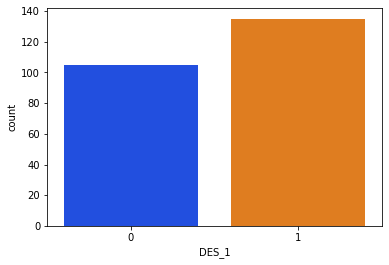

In [34]:
#revisar que la base este balanceada
import seaborn as sns
sns.countplot(x=y_test, palette="bright")

In [35]:
#Escalar los datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
XCS_train = scaler.fit_transform(X_train)
XCS_test = scaler.transform(X_test)

print(XCS_train)
print(XCS_test)

[[0.14285714 0.7114094  0.         ... 1.         1.         1.        ]
 [0.2        0.88255034 0.         ... 1.         1.         0.        ]
 [0.05714286 0.58724832 0.06666667 ... 1.         0.         1.        ]
 ...
 [0.2        0.45973154 0.         ... 1.         1.         1.        ]
 [0.08571429 0.05704698 1.         ... 0.         1.         0.        ]
 [0.08571429 0.75838926 0.13333333 ... 0.         0.         0.        ]]
[[0.08571429 0.64765101 0.06666667 ... 1.         1.         1.        ]
 [0.11428571 0.80201342 0.13333333 ... 1.         1.         1.        ]
 [0.22857143 0.39261745 0.06666667 ... 1.         0.         1.        ]
 ...
 [0.02857143 0.76510067 0.6        ... 1.         0.         1.        ]
 [0.25714286 0.03691275 0.86666667 ... 0.         0.         1.        ]
 [0.08571429 0.94630872 0.06666667 ... 1.         1.         1.        ]]


# Pasos 7, 8, 9: Desarrollar un modelo con los datos de entrenamiento, Usarlo para predecir los valores en los datos de prueba, Calcular las métricas del modelo, y comparar modelos

In [36]:
# Primero, definimos un conjunto de funciones para calcular las métricas del modelo

# Curva ROC
def plot_roc(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1, drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel('1-Specificity (False Negative Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

# Matriz de Confusión: cm[0,0], cm[0,1], cm[1,0], cm[1,1]: tn, fp, fn, tp

# Sensitivity
def custom_sensitivity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fn))

# Specificity
def custom_specificity_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fp))

# Positive Predictive Value
def custom_ppv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tp/(tp+fp))

# Negative Predictive Value
def custom_npv_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return (tn/(tn+fn))

# Accuracy
def custom_accuracy_score(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
    return ((tn+tp)/(tn+tp+fn+fp))

# Modelo № 1: Support Vector Machines

## Probabilidades

In [37]:
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

svm_estimators = []
svm_estimators.append(('normalize', MinMaxScaler())) # escalamos los datos
svm_estimators.append(('svm', svm.SVC(probability=True))) # definimos SVM con probabilidades 
     
# Definimos el modelo SVM y lo llamamos classifier_SVM
Classifier_SVM = Pipeline(svm_estimators, verbose=False)

# Entrenamos el modelo classifier_SVM sobre los datos de entrenamiento
Classifier_SVM.fit(X_train, y_train)

Pipeline(steps=[('normalize', MinMaxScaler()), ('svm', SVC(probability=True))])

In [38]:
# Usamos el modelo desarrollado, para predecir sobre los datos de prueba 
y_pred_prob = Classifier_SVM.predict_proba(X_test)[:,1] # probabilidades
class_threshold = 0.6073
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # clasificación
y_pred_prob

array([9.99998823e-01, 9.99993972e-01, 9.47293787e-01, 6.93045112e-05,
       2.74640104e-06, 9.46973529e-01, 7.91511693e-01, 9.63852077e-01,
       4.12867472e-01, 9.96249804e-01, 8.54039630e-01, 1.03296259e-04,
       9.83305563e-01, 9.79369685e-01, 1.02910067e-03, 5.52350440e-01,
       9.99998812e-01, 9.96454013e-01, 8.44557061e-04, 9.99999611e-01,
       2.66223340e-06, 2.13191754e-05, 1.56464535e-06, 9.73399716e-01,
       2.57084060e-03, 9.31052927e-01, 4.27279526e-05, 4.46348703e-01,
       1.72451774e-06, 9.85003695e-01, 9.92517098e-01, 9.83857754e-01,
       9.83941946e-01, 9.99995638e-01, 9.01597491e-01, 7.35932135e-01,
       9.99988219e-01, 8.67686937e-01, 9.99996212e-01, 1.58418347e-05,
       2.36422376e-03, 1.86758824e-05, 5.59199182e-05, 9.72030506e-01,
       1.84836150e-04, 9.56896879e-01, 9.72135087e-01, 9.99993409e-01,
       9.96012858e-01, 9.99998485e-01, 9.99999057e-01, 9.95032390e-01,
       9.99982420e-01, 1.20365388e-02, 3.02159589e-06, 9.94563077e-01,
      

Métricas del modelo de Máquina de Vectores de Soporte: 

Matriz de Confusión: 
[[ 99   5]
 [  6 130]]
                                   Accuracy: 0.9541666666666667
                       SENSITIVITY (RECALL): 0.9629629629629629
                     SPECIFICITY (FALL-OUT): 0.9428571428571428
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.9558823529411765
                  NEGATIVE PREDICTIVE VALUE: 0.9519230769230769


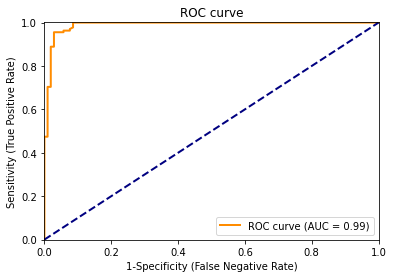

 AUC: 0.9888888888888888


In [39]:
# Usamos el modelo desarrollado, para predecir sobre los datos de prueba 
y_pred_prob = Classifier_SVM.predict_proba(X_test)[:,1] # probabilidades
class_threshold = 0.6073
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # clasificación

# Revisemos las métricas del modelo

print('Métricas del modelo de Máquina de Vectores de Soporte: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Matriz de Confusión: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

Métricas del modelo de Máquina de Vectores de Soporte: 

Matriz de Confusión: 
[[ 97   4]
 [  8 131]]
                                   Accuracy: 0.95
                       SENSITIVITY (RECALL): 0.9703703703703703
                     SPECIFICITY (FALL-OUT): 0.9238095238095239
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.9424460431654677
                  NEGATIVE PREDICTIVE VALUE: 0.9603960396039604


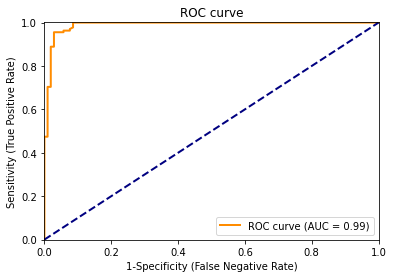

 AUC: 0.9888888888888888


In [40]:
# Usamos el modelo desarrollado, para predecir sobre los datos de prueba 

y_pred_prob = Classifier_SVM.predict_proba(X_test)[:,1] # probabilidades
class_threshold = 0.5

y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # clasificación

# Revisemos las métricas del modelo

print('Métricas del modelo de Máquina de Vectores de Soporte: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Matriz de Confusión: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

## Interpretación de la curva ROC y el AUC: 

- Si tomamos un cliente con una probabilidad pronósticada de 99%, uno con una probabilidad de 50%, y uno con una probabilidad del 1%. Esperaríamos que el modelo nos diera una certeza de que el primer cliente será retenido, y una certeza de que el tercero no lo será, pero podríamos estar cómodos con un error grande para el segundo.

- La curva ROC muestra justamente eso. Ranquea todos los clientes desde el que tiene la probabilidad más alta de retención hasta la más baja (equivale a variar el umbral desde alto hasta bajo). Comenzando en el origen, mapea todos los clientes en orden descendiente de probabilidad (desde el “mejor” hasta el “peor”). Un clasificador perfecto, con exactitud 100%, primero predeciría correctamente todos los positivos, y luego predeciría correctamente todos los negativos; es decir, la curva iría recto hasta el punto (0,1), y luego cambiaría y sería horizontal hasta el punto (1,1). Esto, por supuesto, no es posible en la práctica, y los “pasos” en la curva reflejan los errores ocasionales que el modelo comete. Un buen modelo cometería pocos errores positivos para los mejores clientes y pocos eroreres negativos para los peores.

-  Es importante observar que un modelo que simplemente adivina al azar, tendrá como curva ROC una línea de 45 grados. Tal modelo tendría la misma probabilidad de hacer una predicción correcta que una incorrecta, sin importar si el cliente tiene una alta o baja probabilidad predecida.

- En este caso el AUC es 86.26% el cual es un buen resultado. El AUC indica la proporción de parejas concordantes en los datos; en este caso el porcentaje de parejas concordantes es aproximadamente 86.26%. Las parejas concordantes son aquellas parejas de casos positivo y negativo en el dataset para las cuales el modelo de SVM - con ciertos parámetros (UMBRAL) - puede clasificarlos correctamente.

- En el dataset de prueba, tenemos 289 positivos (clientes retenidos) y 189 negativos (clientes no retenidos); el número total de parejas (positivos y negativos) es 289 x 189 = 54621, de los cuales el 86.26 % (== 47116) tienen unos parámetros (UMBRAL) del modelo de SVM que pueden clasificarlos correctamente.

# Creación modelo SVM Kernel lineal

In [58]:
#MODELO USANDO TODAS LAS VARIABLES
# Desarrollamos un clasificador SVM LINEAL
clfl = svm.SVC(kernel='linear', C=1000, probability=True, random_state=55854) # Linear Kernel

# Entrenamos el modelo usando el dataset de entrenamiento
clfl.fit(XCS_train, y_train)

# Importamos el módulo scikit-learn metrics para cálculo de Accuracy
from sklearn import metrics

#Pronosticamos la respuesta para el dataset de prueba
#En entrenamiento
y_predl_e = clfl.predict(XCS_train)
#En prueba
y_predl = clfl.predict(XCS_test)

#Accuracy del modelo:  Qué tan frecuentemente el clasificador es correcto?
#En entrenamiento: 
print("Accuracy - entrenamiento: ",metrics.accuracy_score(y_train, y_predl_e))
#En prueba: 
print("Accuracy - prueba: ",metrics.accuracy_score(y_test, y_predl))


Accuracy - entrenamiento:  0.9946428571428572
Accuracy - prueba:  0.9625


Métricas del modelo de Máquina de Vectores de Soporte (ENTRENAMIENTO): 

Matriz de Confusión: 
[[243   1]
 [  2 314]]
                                   Accuracy: 0.9946428571428572
                       SENSITIVITY (RECALL): 0.9968253968253968
                     SPECIFICITY (FALL-OUT): 0.9918367346938776
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.9936708860759493
                  NEGATIVE PREDICTIVE VALUE: 0.9959016393442623

 
Métricas del modelo de Máquina de Vectores de Soporte (PRUEBA): 

Matriz de Confusión: 
[[102   6]
 [  3 129]]
                                   Accuracy: 0.9625
                       SENSITIVITY (RECALL): 0.9555555555555556
                     SPECIFICITY (FALL-OUT): 0.9714285714285714
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.9772727272727273
                  NEGATIVE PREDICTIVE VALUE: 0.9444444444444444


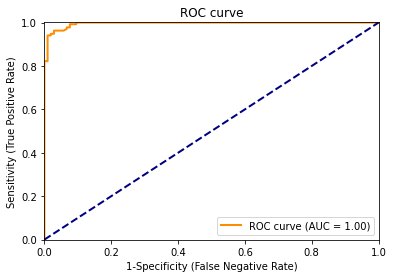

 AUC: 0.9955202821869488


In [59]:
from sklearn.metrics import confusion_matrix

# Revisemos las métricas del modelo en entrenamiento

print('Métricas del modelo de Máquina de Vectores de Soporte (ENTRENAMIENTO): \n')

cml_e = np.transpose(confusion_matrix(y_train, y_predl_e))
print("Matriz de Confusión: \n" + str(cml_e))

print("                                   Accuracy: " + str(custom_accuracy_score(y_train, y_predl_e))) 
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_train, y_predl_e)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_train, y_predl_e)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_train, y_predl_e)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_train, y_predl_e)))

# Revisemos las métricas del modelo en prueba

print('\n \nMétricas del modelo de Máquina de Vectores de Soporte (PRUEBA): \n')

cml = np.transpose(confusion_matrix(y_test, y_predl))
print("Matriz de Confusión: \n" + str(cml))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_predl))) 
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_predl)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_predl)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_predl)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_predl)))


y_pred_prob = clfl.predict_proba(XCS_test)[:,1] # probabilidades
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # clasificación

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

In [60]:
# Datos del hiperplano de separación

w = clfl.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clfl.intercept_[0]) / w[1]

In [48]:
w

array([ 1.17608100e+01,  5.44729444e+00, -5.92395939e+01,  4.00937210e+00,
       -1.74227970e+01,  2.28249895e+01, -1.00033966e+00, -6.94218122e-01,
        1.84188513e-01,  1.10764751e+00,  5.43757396e+00, -1.73485722e+00,
        1.97219520e+00,  6.57809234e-01,  3.61349580e+00,  4.51616482e-02,
        5.84270399e+00])

In [50]:
clfl.intercept_[0]

-0.24481017917113496

In [63]:
#  Anchura del margen

import math
def mag(x): 
    return math.sqrt(sum(i**2 for i in x))
print(2/mag(w))

0.02947312224608911


In [68]:
#vectores de soporte
clfl.support_vectors_

array([[0.14285714, 0.74832215, 0.2       , 1.        , 0.73333333,
        0.36445242, 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ],
       [0.        , 0.94630872, 0.26666667, 0.        , 0.66666667,
        0.6929982 , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        ],
       [0.25714286, 0.36912752, 0.13333333, 0.        , 0.36666667,
        0.19030521, 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        ],
       [0.17142857, 0.72483221, 0.13333333, 0.        , 0.71666667,
        0.29084381, 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        ],
       [0.17142857, 0.4295302 , 0.13333333, 0.      

In [66]:
###  Ejecución de SVM con las 3 variables más importantes (usando RFE), y evaluar desempeño

In [64]:
### REFERENCIAS SOBRE RFE (Recursive Feature Elimination)
### https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15
### https://www.kite.com/python/docs/sklearn.feature_selection.RFE

from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

# create the RFE model for the svm classifier and select attributes
rfeSVM = RFE(estimator=clfl, n_features_to_select=3, step=1) 
rfeSVM.fit(XCS_train, y_train)

ranking = rfeSVM.ranking_.reshape(len(X_train.columns))

# Cuáles son las 20 variables que quedan en el modelo?
pd.DataFrame([X_test.columns,ranking]).transpose().sort_values(1).head(3)

,0,1
1,PROM,1
2,MAT,1
5,ING,1


Tras realizar el proceso de RFE se observa que las tres variables más influyentes a la hora de determinar si un estudiante deserta o no, son el promedio (PROM), la cantidad de materias que ha tenido que repetir el estudiante (MAT) y el puntaje obtenido en la prueba diagnostia utilizada por la universidad (ING)

Métricas del modelo de SVM después de la selección de variables: 

Matriz de confusión: 
[[ 98   6]
 [  7 129]]
                                   Accuracy: 0.9458333333333333
                       SENSITIVITY (RECALL): 0.9555555555555556
                     SPECIFICITY (FALL-OUT): 0.9333333333333333
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.9485294117647058
                  NEGATIVE PREDICTIVE VALUE: 0.9423076923076923


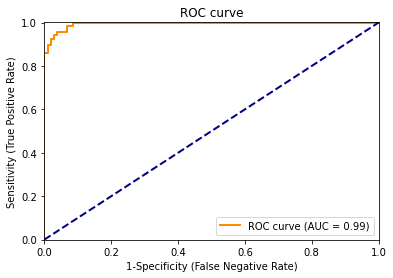

 AUC: 0.9948500881834214


In [65]:
# Entrenemos el nuevo modelo y llamemoslo classifier_SVML_RFE 
classifier_SVML_RFE = rfeSVM.fit(XCS_train, y_train)

# Usemos el modelo entrenado para predecir sobre los datos de prueba
y_pred_prob = classifier_SVML_RFE.predict_proba(XCS_test)[:,1] # probabilidades
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # clasificación

# Revisemos las métricas del modelo después de la selección de variables 
print('Métricas del modelo de SVM después de la selección de variables: \n')

cm = np.transpose(confusion_matrix(y_test, y_pred))
print("Matriz de confusión: \n" + str(cm))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_pred))) 
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_pred)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_pred)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_pred)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_pred)))

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

Interprete en contexto dos de las métricas de la matriz
Como primer aspecto al observar la matriz se destaca que no tiende a cometer tantos errores, es decir la tasa de falsos positivos y de falsos negativos es pequeña a comparación de la tasa de verdaderos positivos y verdaderos negativos. 

Observamos que tiene un Accuracy de 0.94583 indicandonos que es un modelo con una exactitud de casi el 95%, es decir que en sus predicciones se equivoca solo en un 5%, esto tambien se puede ver con la sensibilidad y la especificidad que tiene, ambas por encima del 90%.

Finalmente se observa que la curva ROC es casi un cuadrado, mostrando que tiene que sacrificar muy pocos datos para dar con un resultado positivo, otra forma de verlo es con el AUC de 99%

f) (1 punto) Se tiene una observación nueva de un estudiante: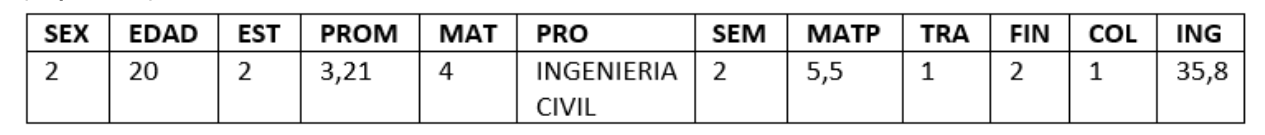
 Clasifique a este estudiante a partir de su modelo ajustado, sin ayuda de Python. Trabaje con los máximos y mínimos de cada variable dentro de la base de datos original (aunque no necesariamente sean los mismos máximos y mínimos de los datos de entrenamiento del modelo). Es posible que deba recordar la formula con la cual se escalan datos entre 0 y 1. Muestre el procedimiento realizado.

 

PROM : 3,21
MAT: 4
ING: 35,8
El estudiante ha tenido que repetir varias materias, obtuvo un puntaje en la prueba de diagnostico medio, es decir casi que saco la mitad de los puntos, y tiene un puntaje cercano a 3, es probable que se retire

Para obtener este resultado se utliza la función de los betas, donde los betas vienen a ser determinados por la función obtenida por el hiper parametro anteriormente y los valores que toma X son los valores que toman los diferentes atributos de la observación.  

7. (0.6 puntos) Para la Facultad es muy importante identificar correctamente a la mayor cantidad de estudiantes que SERÁN REALMENTE DESERTORES, para poder diseñar las estrategias que sean necesarias. Ajuste un nuevo modelo e indique claramente todos los parámetros que utilizó (diferentes a los que están por defecto) que mejore esta medida de desempeño con respecto al modelo del punto 6. para random_state use los 5 últimos dígitos de su ID.

Se acomoda el modelo para que sea radial, manteniendo el costo de 1000, debido a que el perder un estudiante es costoso para la universidad y se agrega un gamma de 0.07, brindandole un rango de acción al modelo un poco más pequeño que el que trae por defecto (gamma=0.05) 

In [75]:
#MODELO 2
#MODELO USANDO TODAS LAS VARIABLES
# Desarrollamos un clasificador SVM LINEAL
clflR = svm.SVC(kernel='rbf', C=1000, probability=True, random_state=55854, gamma=0.07) # Linear Kernel

# Entrenamos el modelo usando el dataset de entrenamiento
clflR.fit(XCS_train, y_train)

# Importamos el módulo scikit-learn metrics para cálculo de Accuracy
from sklearn import metrics

#Pronosticamos la respuesta para el dataset de prueba
#En entrenamiento
y_predl_e = clflR.predict(XCS_train)
#En prueba
y_predl = clflR.predict(XCS_test)

#Accuracy del modelo:  Qué tan frecuentemente el clasificador es correcto?
#En entrenamiento: 
print("Accuracy - entrenamiento: ",metrics.accuracy_score(y_train, y_predl_e))
#En prueba: 
print("Accuracy - prueba: ",metrics.accuracy_score(y_test, y_predl))


Accuracy - entrenamiento:  1.0
Accuracy - prueba:  0.9541666666666667


A continuación se muestran las metricas obtenidas para dicho modelo, para el caso de train se observa un funcionamiento perfecto y para el de test se obtiene un Accuracy 0.9541666, superior al presentado por el primer modelo 

Métricas del modelo de Máquina de Vectores de Soporte (ENTRENAMIENTO): 

Matriz de Confusión: 
[[245   0]
 [  0 315]]
                                   Accuracy: 1.0
                       SENSITIVITY (RECALL): 1.0
                     SPECIFICITY (FALL-OUT): 1.0
     POSITIVE PREDICTIVE VALUE, (PRECISION): 1.0
                  NEGATIVE PREDICTIVE VALUE: 1.0

 
Métricas del modelo de Máquina de Vectores de Soporte (PRUEBA): 

Matriz de Confusión: 
[[ 98   4]
 [  7 131]]
                                   Accuracy: 0.9541666666666667
                       SENSITIVITY (RECALL): 0.9703703703703703
                     SPECIFICITY (FALL-OUT): 0.9333333333333333
     POSITIVE PREDICTIVE VALUE, (PRECISION): 0.9492753623188406
                  NEGATIVE PREDICTIVE VALUE: 0.9607843137254902


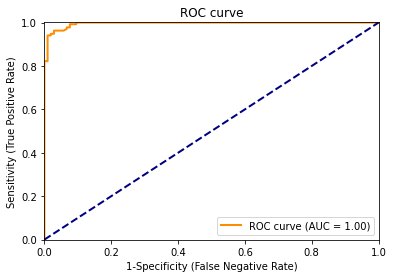

 AUC: 0.9955202821869488


In [76]:
from sklearn.metrics import confusion_matrix

# Revisemos las métricas del modelo en entrenamiento

print('Métricas del modelo de Máquina de Vectores de Soporte (ENTRENAMIENTO): \n')

clflR = np.transpose(confusion_matrix(y_train, y_predl_e))
print("Matriz de Confusión: \n" + str(clflR))

print("                                   Accuracy: " + str(custom_accuracy_score(y_train, y_predl_e))) 
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_train, y_predl_e)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_train, y_predl_e)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_train, y_predl_e)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_train, y_predl_e)))

# Revisemos las métricas del modelo en prueba

print('\n \nMétricas del modelo de Máquina de Vectores de Soporte (PRUEBA): \n')

cml = np.transpose(confusion_matrix(y_test, y_predl))
print("Matriz de Confusión: \n" + str(cml))

print("                                   Accuracy: " + str(custom_accuracy_score(y_test, y_predl))) 
print("                       SENSITIVITY (RECALL): " + str(custom_sensitivity_score(y_test, y_predl)))
print("                     SPECIFICITY (FALL-OUT): " + str(custom_specificity_score(y_test, y_predl)))
print("     POSITIVE PREDICTIVE VALUE, (PRECISION): " + str(custom_ppv_score(y_test, y_predl)))
print("                  NEGATIVE PREDICTIVE VALUE: " + str(custom_npv_score(y_test, y_predl)))


y_pred_prob = clfl.predict_proba(XCS_test)[:,1] # probabilidades
y_pred = np.where(y_pred_prob > class_threshold, 1, 0) # clasificación

plot_roc(y_test, y_pred_prob)
print(" AUC: " + str(roc_auc_score(y_test, y_pred_prob)))

8. (0.3 puntos) Este punto es totalmente independiente de los anteriores: ¿Siendo usted un experto en educación que variables de la base de datos eliminaría desde el principio y porqué (dos variables)? ¿Qué variables agregaría a la base de datos y porqué (mínimo dos)?

Agregaria variables de intereses y gustos del estudiante debido a que a tarves de estas se puede dar un mayor conocimiento del estudiante, es decir podríamos saber si de verdad le gusta lo que estudia o no, ya que en caso de que no le llame la atención si puede llegar a influir en una decersión del estudiante. Adicionalmente la variable de en cual semestre va el estudiante, debido a que según estudios realizados es más probable que un estudiante se cambie en los primeros semestres, o cuando no ha avanzado mucho en el programa, es decir la variable también podría ser porcentaje de avance en el programa, ya que quienes están por terminar es más probable que se graduen a si se hayan dado cuenta que lo que estudiaron no les gusta.  

Por otro lado eliminaria las variables del colegio (COL) ya que el que le guste el programa, se quede en este es casi que independiente de la preparación anterior que tuvo un estudiante, como se puede observar en la siguiente sección de código, es una de las variables menos influyentes a la hora de determinar si el estudiante va a desertar o no. Adicionalmente descartaria en semestre del año en el que ingreso, ya que este tipo de análisis no se ve influenciado por aspectos como el tiempo, son más importantes aspectos como el saber los motivos por los cuales el estudiante decide estudiar x programa, si puede financiarlo, su desempeño en este programa, etc.. 

In [67]:
### REFERENCIAS SOBRE RFE (Recursive Feature Elimination)
### https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15
### https://www.kite.com/python/docs/sklearn.feature_selection.RFE

from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

# create the RFE model for the svm classifier and select attributes
rfeSVMIN = RFE(estimator=clfl, n_features_to_select=50, step=1) 
rfeSVMIN.fit(XCS_train, y_train)

ranking = rfeSVMIN.ranking_.reshape(len(X_train.columns))

# Cuáles son las 20 variables que quedan en el modelo?
pd.DataFrame([X_test.columns,ranking]).transpose().sort_values(1).head(50)

,0,1
0,EDAD,1
14,TRA_2,1
13,PRO_INGENIERIA MECANICA,1
12,PRO_INGENIERIA INDUSTRIAL,1
11,PRO_INGENIERIA CIVIL,1
10,PRO_INGENIERIA AMBIENTAL,1
9,EST_5,1
15,FIN_2,1
8,EST_4,1
6,SEX_2,1


## Resumen del SVM: 

- entrenamos el modelo con los hiper-parámetros por defecto
- aplicando el modelo al dataset de prueba, obtuvimos AUC=  %
- ahora, sintonizaremos los hiper-parámetros del modelo ...